
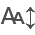

Reading dataset='collnet', prof_group='L2'
Reading dataset='socialnet', prof_group='data'
Reading dataset='roadnet', prof_group='L2'
Reading dataset='socialnet', prof_group='L2'
Reading dataset='collnet', prof_group='data'
Reading dataset='roadnet', prof_group='data'
Dataset: collnet
	Profiler group: L2
                          Metric     Core 0     Core 1     Core 2     Core 3
0            Runtime (RDTSC) [s]     2.7203     1.9118     2.1608     1.9989
1           Runtime unhalted [s]     2.3320     2.4246     2.4213     2.4205
2                    Clock [MHz]  2991.2644  2990.8487  2990.8537  2990.8506
3                            CPI    14.8787    14.9582    14.7657    14.9044
4  L2D load bandwidth [MBytes/s]   219.1809    92.3750    81.3485    88.4073

	Profiler group: data
                         Event Counter      Core 0      Core 1      Core 2
0            INSTR_RETIRED_ANY   FIXC0   356864900   380571900   381249900
1        CPU_CLK_UNHALTED_CORE   FIXC1  5315092000  54938120

In [ ]:
import pandas as pd
import os
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

# Define the path to the data folder
data_folder = 'data'

# List all CSV files in the data folder
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

# Read and parse each CSV files
data_frames = {}
for file in csv_files:
    dataset, prof_group, *_ = file[:-4].split('_')
    file_path = os.path.join(data_folder, file)
    print(f"Reading {dataset=}, {prof_group=}")
    if data_frames.get(dataset) is None: data_frames[dataset] = {}
    match prof_group:
        case 'data':
            data_frames[dataset][prof_group] = pd.read_csv(file_path, skiprows=8, nrows=5)
        case 'L2':
            data_frames[dataset][prof_group] = pd.read_csv(file_path, skiprows=24, nrows=10)

# Describe the data_frames disctionary
for dataset in data_frames.keys():
    print(f"Dataset: {dataset}")
    for group in data_frames[dataset].keys():
        print(f"\tProfiler group: {group}")
        df: pd.DataFrame = data_frames[dataset][group]
        print(df[df.columns[:5]].head())
        print()

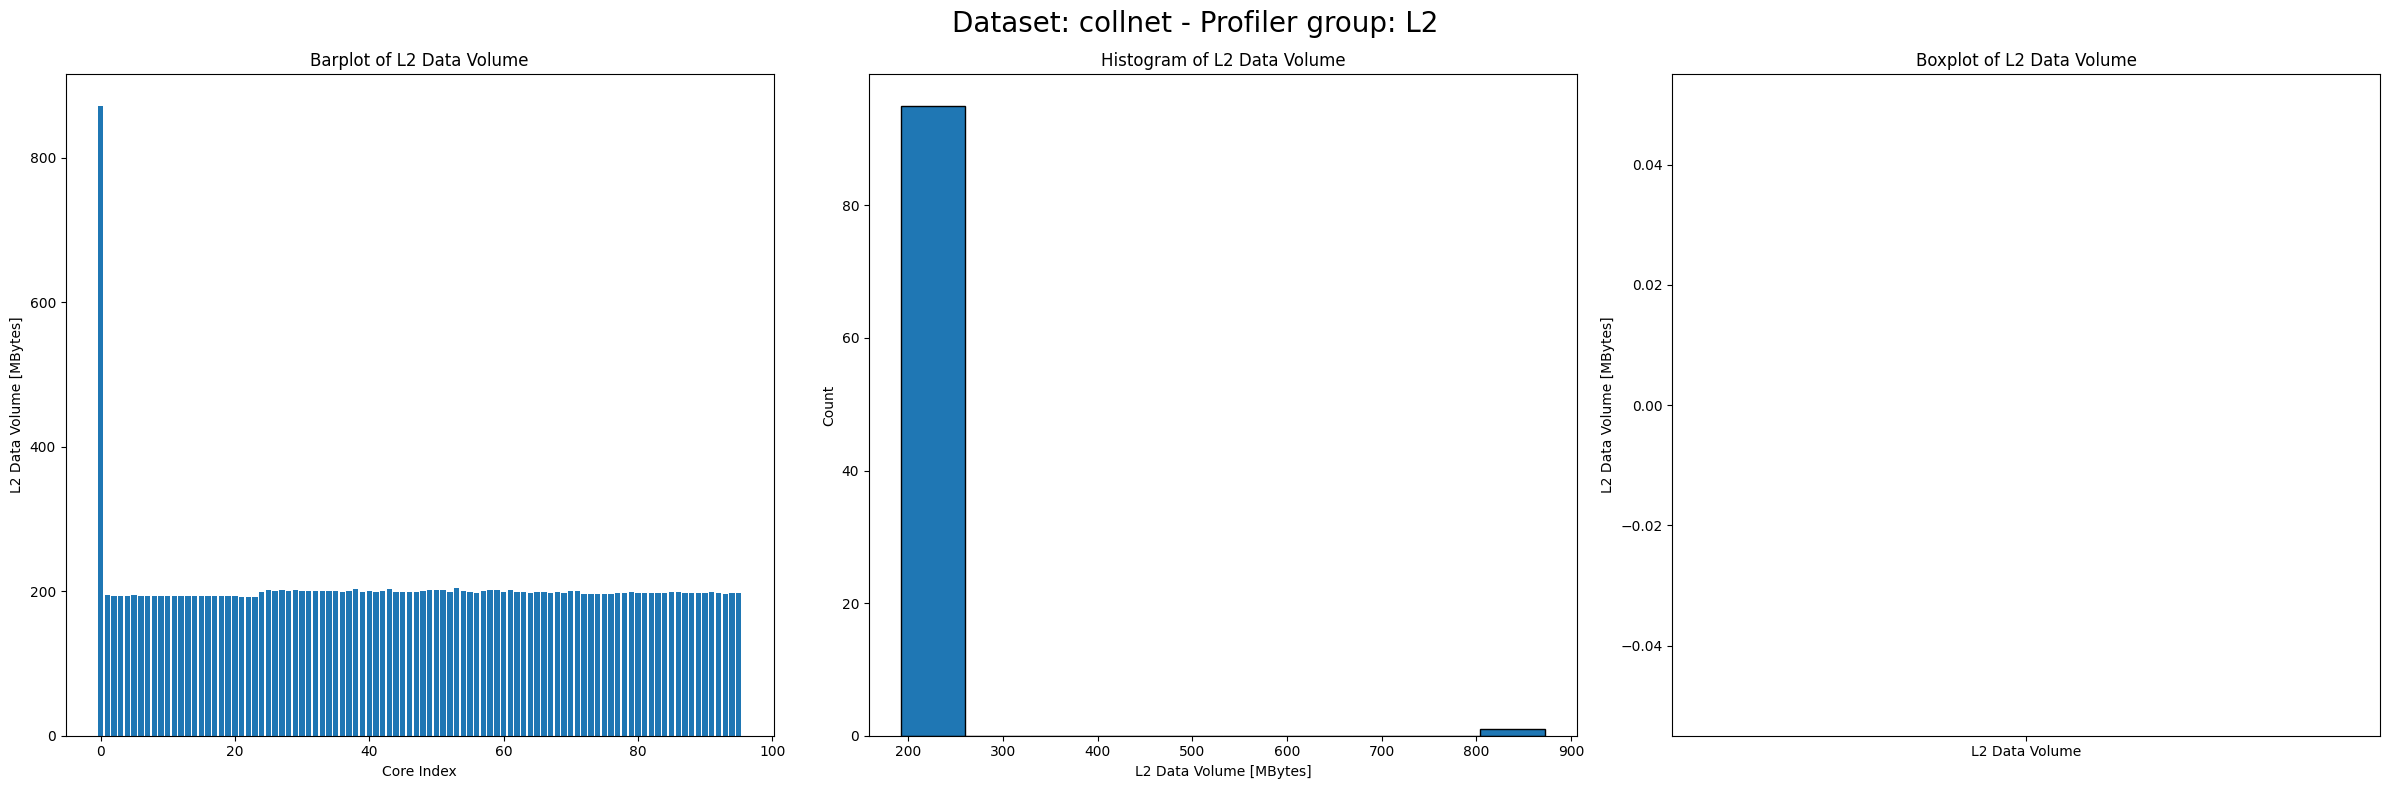

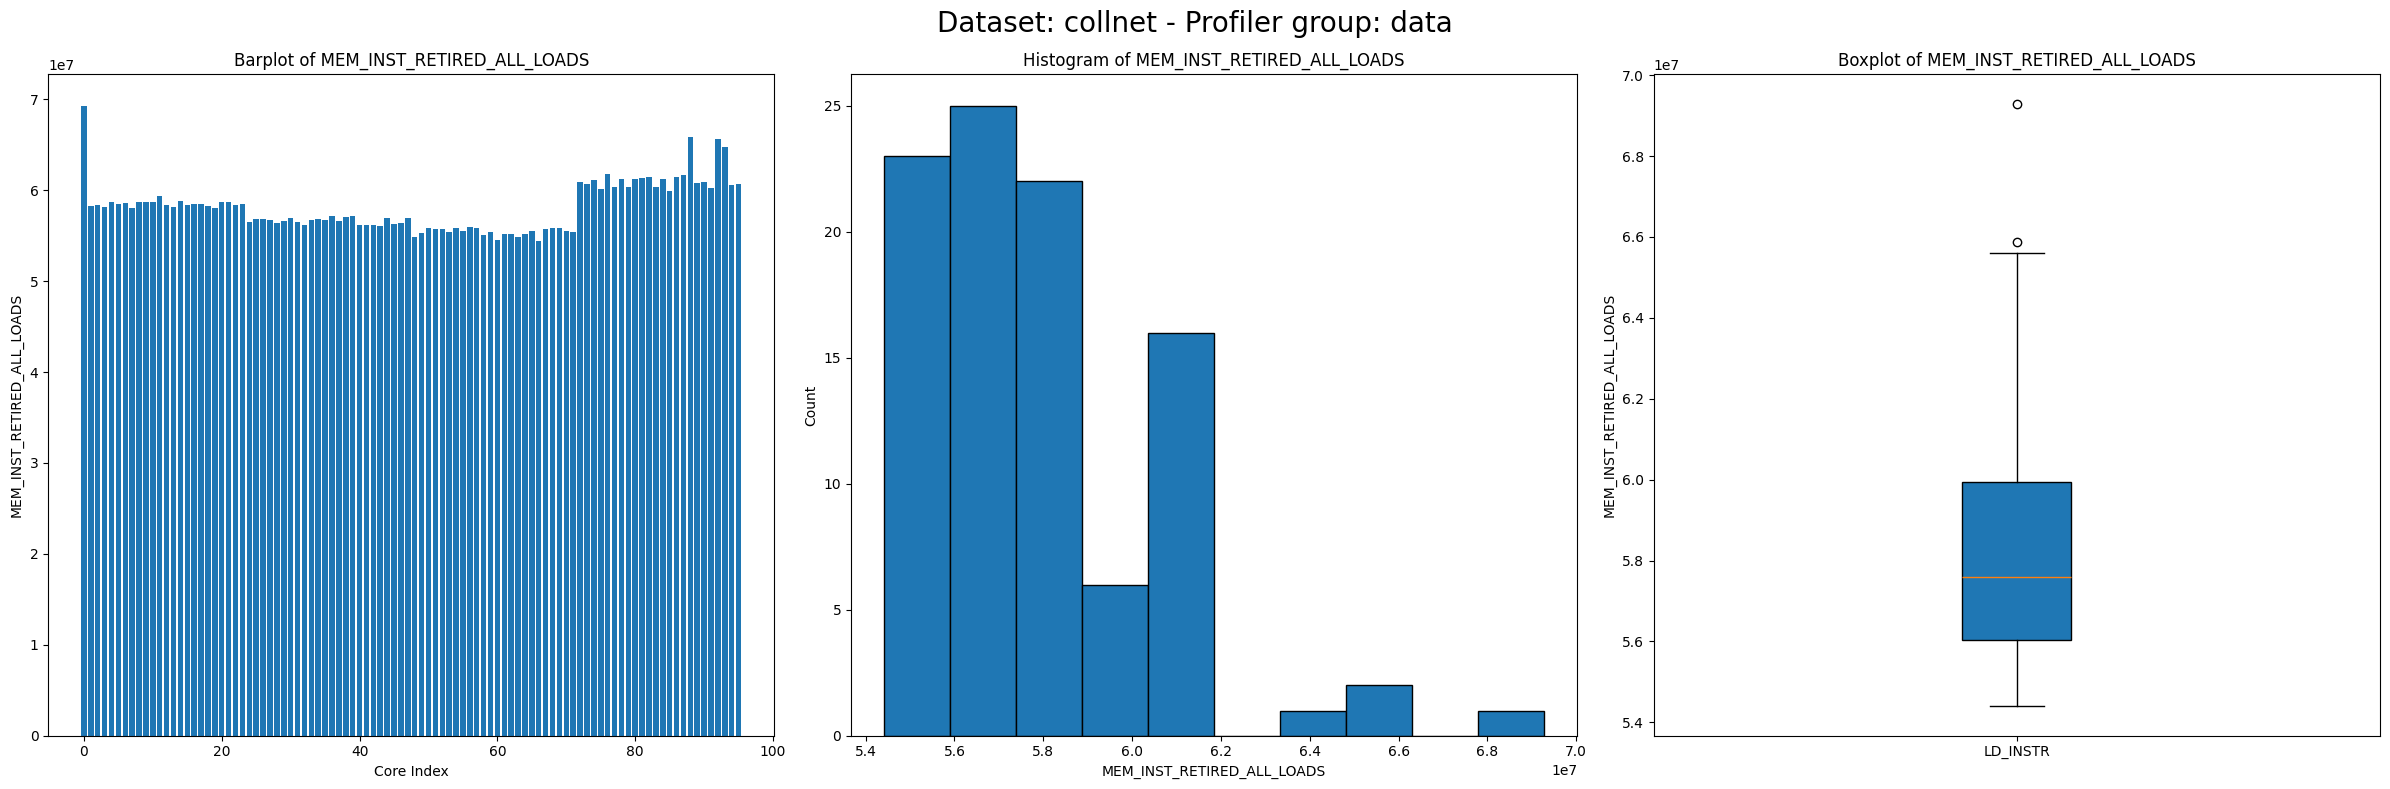

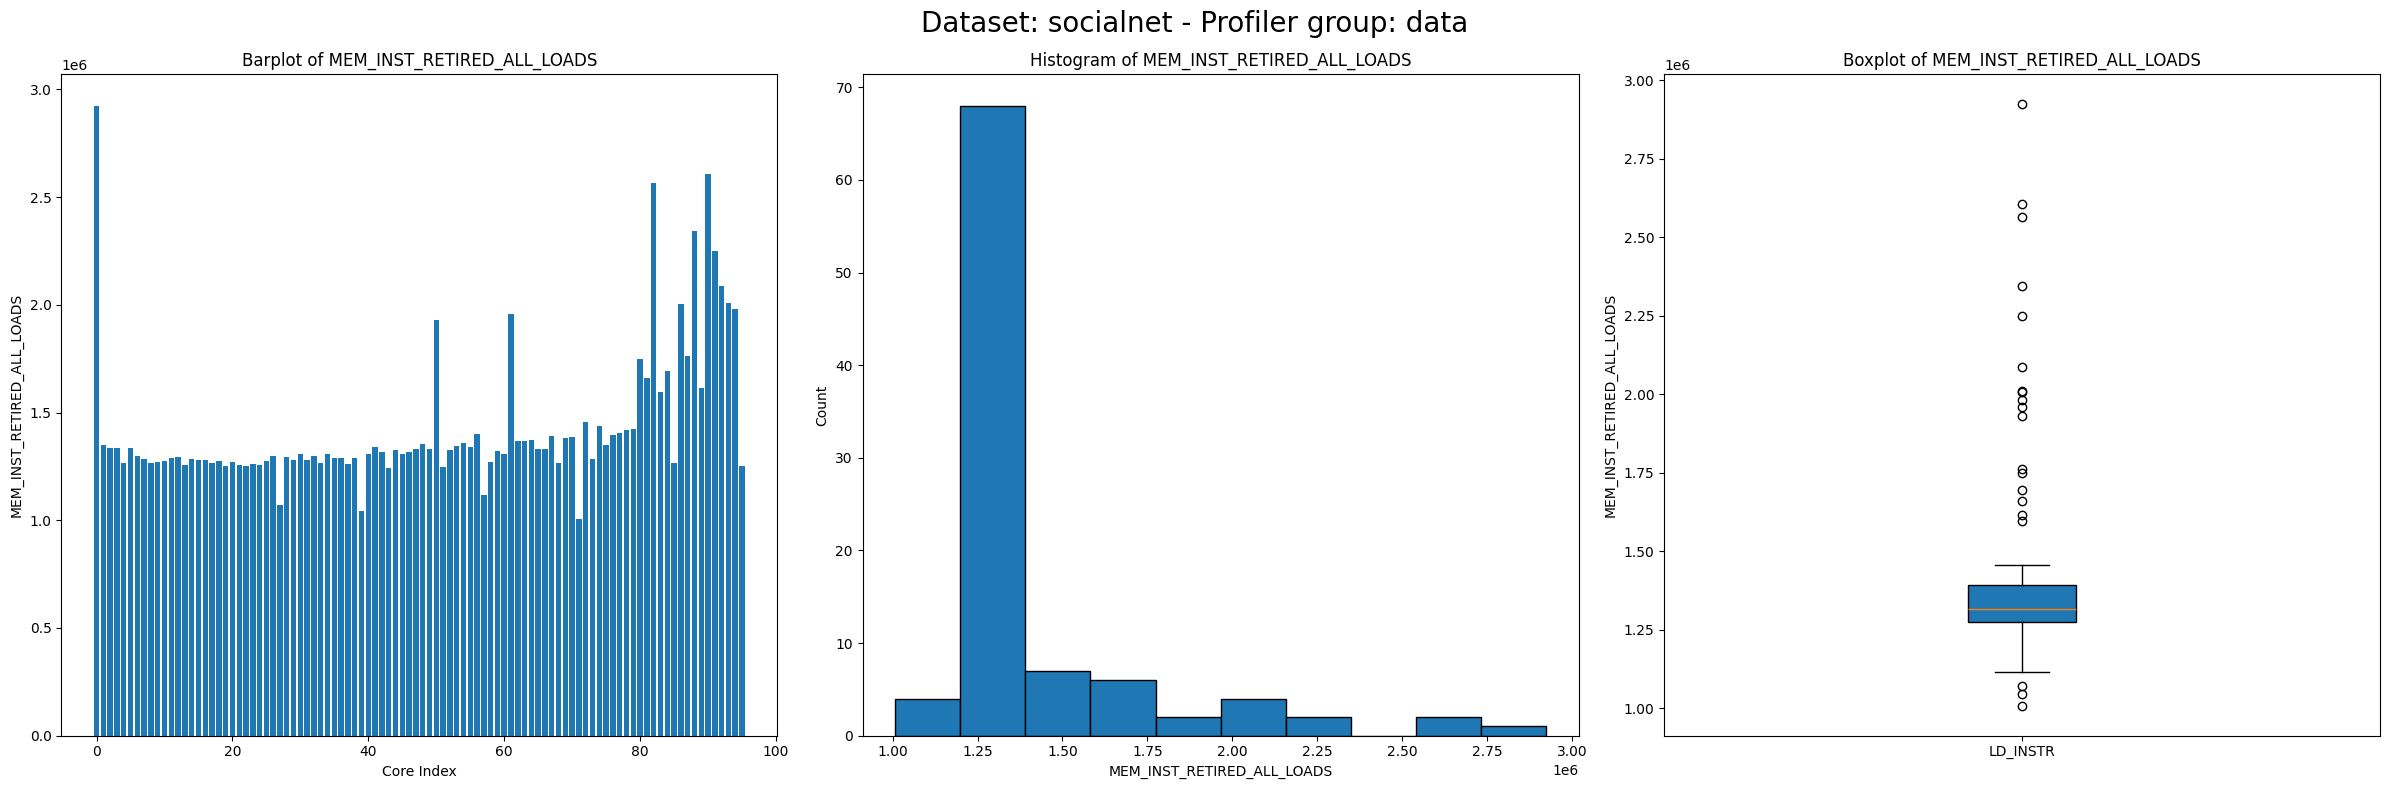

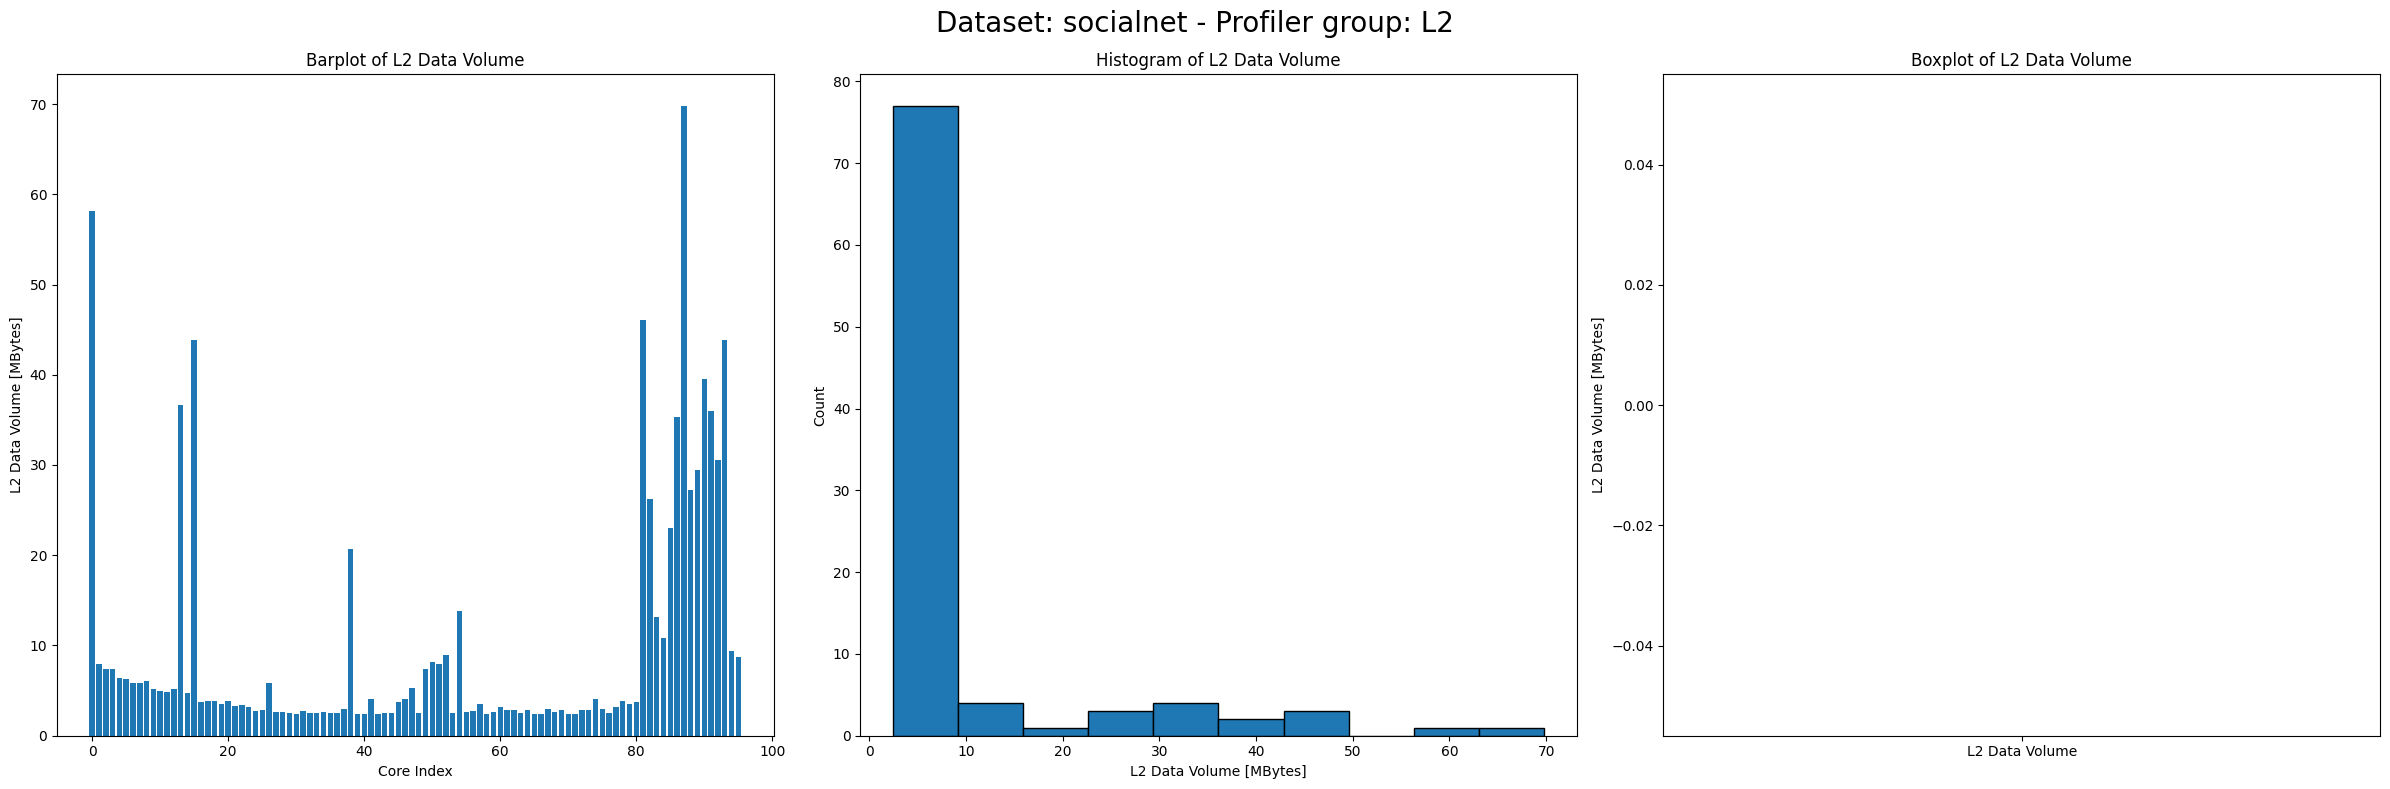

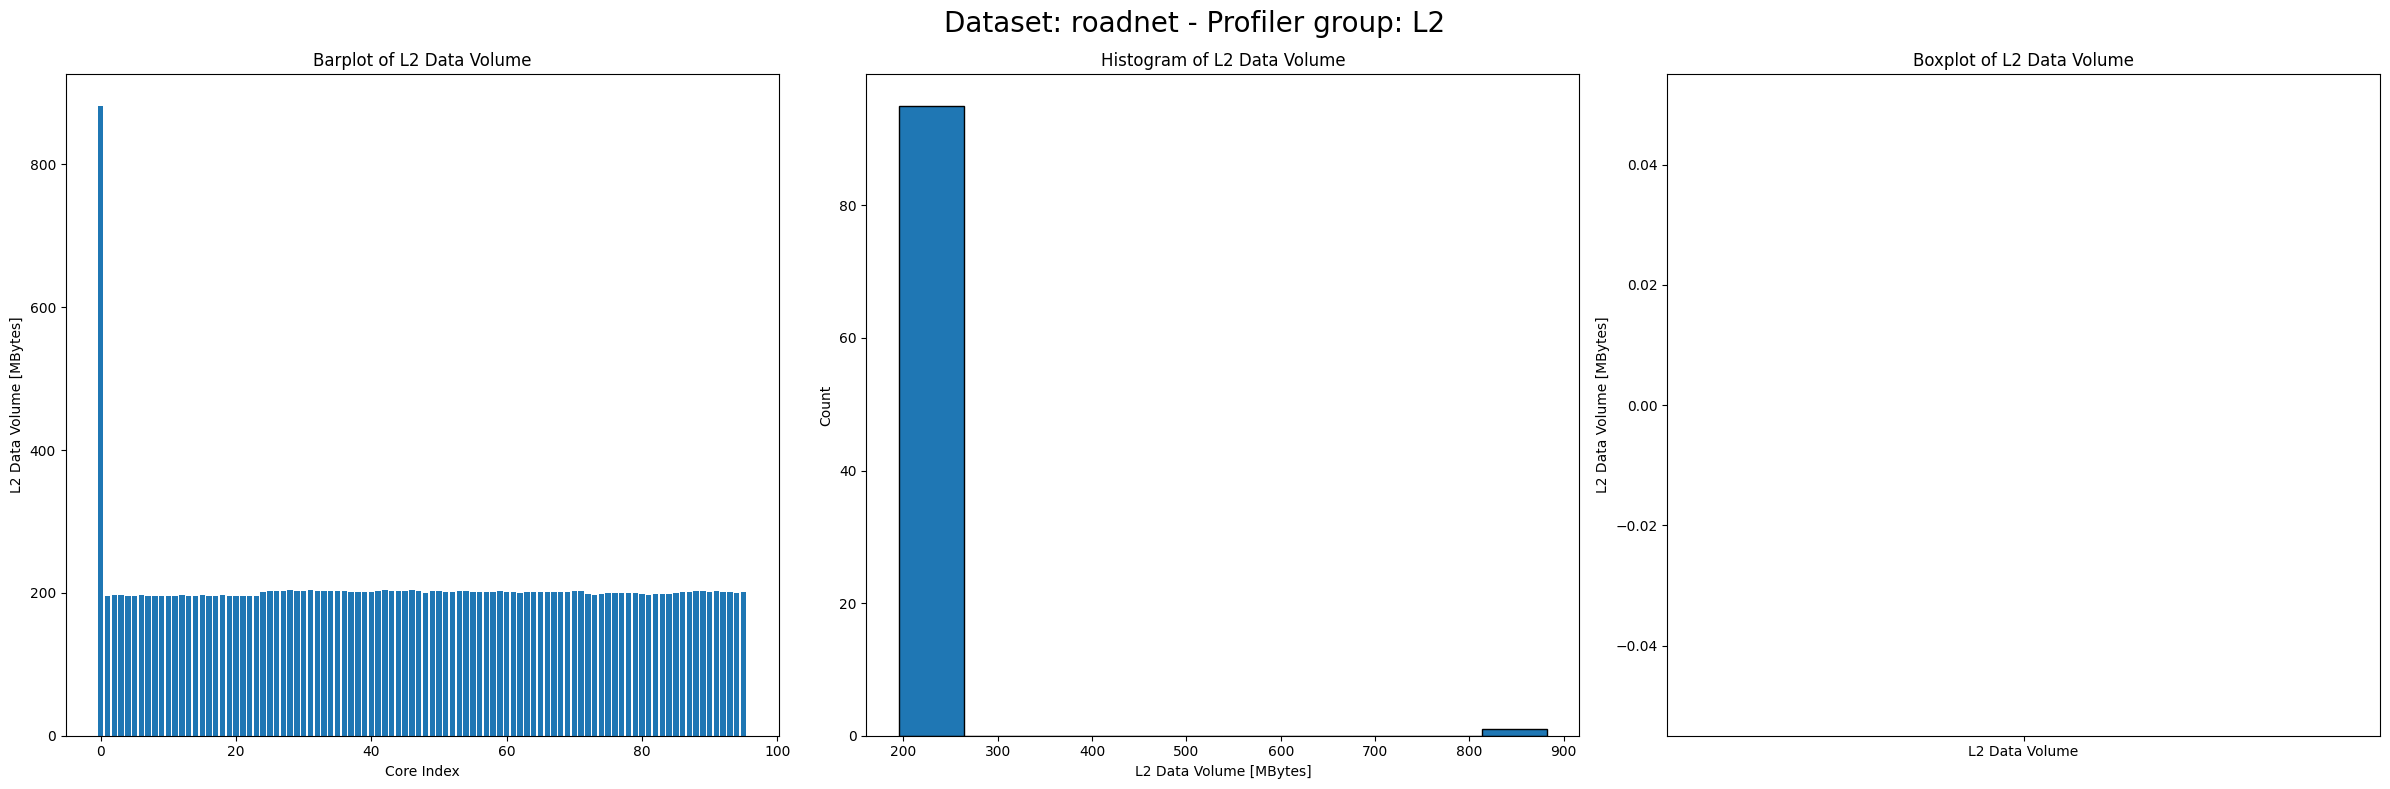

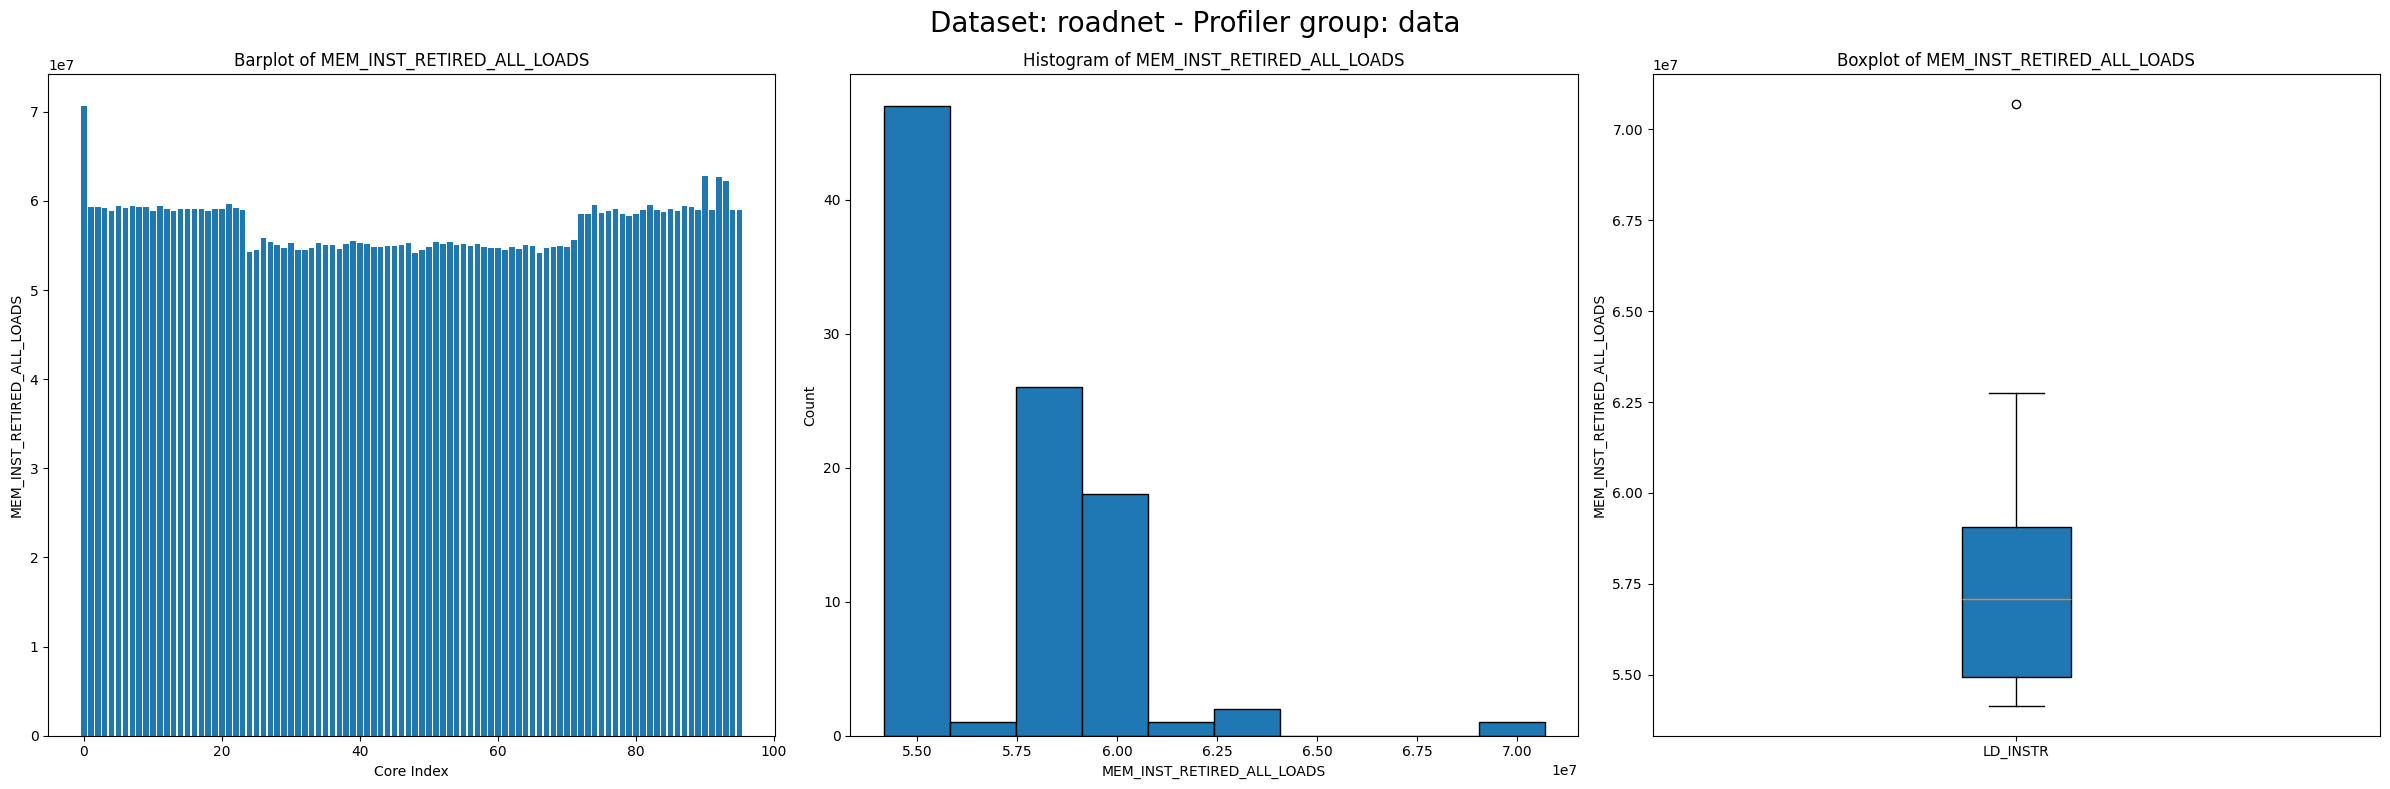

In [75]:
import matplotlib.pyplot as plt

FIG_SIZE = (24, 8)

def plot_L2(df, title):
    # Extract the row containing L2 data volume
    l2_data_volume = df[df['Metric'] == 'L2 data volume [GBytes]'].iloc[0, 1:]
    l2_data_volume = l2_data_volume * 1e3  # Convert to MBytes
    # show(l2_data_volume)
    l2_data_volume = l2_data_volume.to_list()

    # Create a figure with subplots
    fig, axs = plt.subplots(1, 3, figsize=FIG_SIZE)
    fig.suptitle(title, fontsize=20)

    # Generate barplot
    axs[0].bar(range(len(l2_data_volume)), l2_data_volume)
    axs[0].set_title('Barplot of L2 Data Volume')
    axs[0].set_xlabel('Core Index')
    axs[0].set_ylabel('L2 Data Volume [MBytes]')

    # Generate histogram
    axs[1].hist(l2_data_volume, bins=10, edgecolor='black')
    axs[1].set_title('Histogram of L2 Data Volume')
    axs[1].set_xlabel('L2 Data Volume [MBytes]')
    axs[1].set_ylabel('Count')

    # Generate boxplot
    axs[2].boxplot(l2_data_volume, patch_artist=True, tick_labels=['L2 Data Volume'])
    axs[2].set_title('Boxplot of L2 Data Volume')
    axs[2].set_ylabel('L2 Data Volume [MBytes]')

    fig.tight_layout()
    plt.show()

def plot_DATA(df, title):
    # Extract the row containing MEM_INST_RETIRED_ALL_LOADS
    mem_inst_retired_all_loads = df[df['Event'] == 'MEM_INST_RETIRED_ALL_LOADS'].iloc[0, 2:]
    # show(mem_inst_retired_all_loads)
    mem_inst_retired_all_loads = mem_inst_retired_all_loads.to_list()

    # Create a figure with subplots
    fig, axs = plt.subplots(1, 3, figsize=FIG_SIZE)
    fig.suptitle(title, fontsize=20)

    # Generate barplot
    axs[0].bar(range(len(mem_inst_retired_all_loads)), mem_inst_retired_all_loads)
    axs[0].set_title('Barplot of MEM_INST_RETIRED_ALL_LOADS')
    axs[0].set_xlabel('Core Index')
    axs[0].set_ylabel('MEM_INST_RETIRED_ALL_LOADS')

    # Generate histogram
    axs[1].hist(mem_inst_retired_all_loads, bins=10, edgecolor='black')
    axs[1].set_title('Histogram of MEM_INST_RETIRED_ALL_LOADS')
    axs[1].set_xlabel('MEM_INST_RETIRED_ALL_LOADS')
    axs[1].set_ylabel('Count')

    # Generate boxplot
    axs[2].boxplot(mem_inst_retired_all_loads, patch_artist=True, tick_labels=['LD_INSTR'])
    axs[2].set_title('Boxplot of MEM_INST_RETIRED_ALL_LOADS')
    axs[2].set_ylabel('MEM_INST_RETIRED_ALL_LOADS')

    fig.tight_layout()
    plt.show()

for dataset in data_frames.keys():
    for group in data_frames[dataset].keys():
        df: pd.DataFrame = data_frames[dataset][group]
        title = f'Dataset: {dataset} - Profiler group: {group}'
        match group:
            case 'data':
                plot_DATA(df, title)
            case 'L2':
                plot_L2(df, title)

